In [1]:
import numpy as np
import pymc3 as pm

%pylab inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'

Populating the interactive namespace from numpy and matplotlib


In [2]:
pm.__version__

'3.10.0'

In [3]:
size = 200
true_intercept = 1
true_slope = 2

X = np.linspace(0, 1, size)
noise = np.random.normal(scale=0.5, size=size)
y = (X * true_slope + true_intercept) + noise

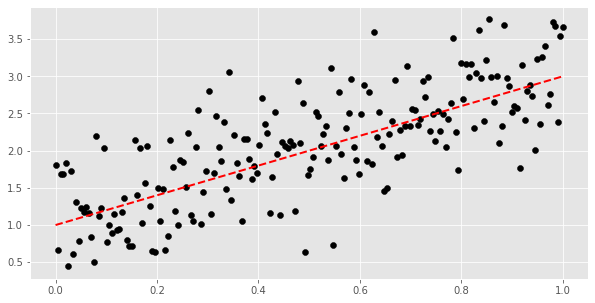

In [4]:
plt.scatter(X, y, c="black")
plt.plot(X, (X * true_slope + true_intercept), c='red')
plt.show()

In [6]:
with pm.Model() as model:
    sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
    intercept = pm.Normal('intercept', mu=0, sigma=1)
    weights = pm.Normal('weights', mu=0, sigma=1)

    likelihood = pm.Normal("y", mu=weights * X + intercept, sigma=sigma, observed=y)
    trace = pm.sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights, intercept, sigma]


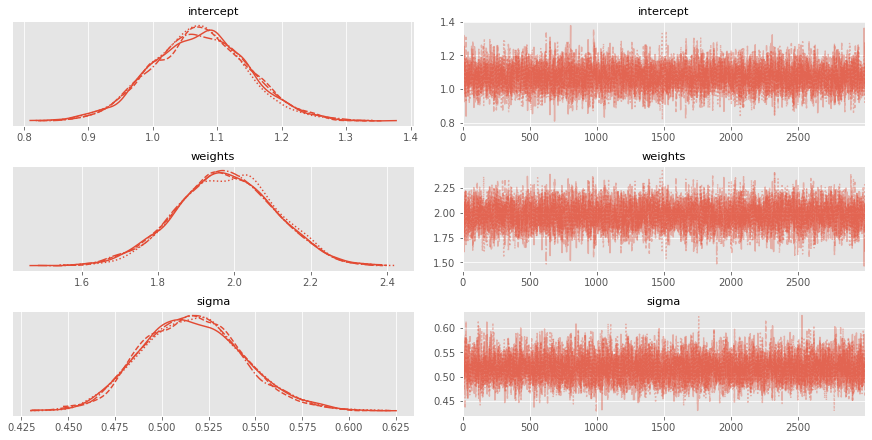

In [7]:
pm.traceplot(trace)
plt.show()

In [8]:
data = dict(x=X, y=y)

with pm.Model() as model:
    pm.glm.GLM.from_formula("y ~ x", data)
    trace = pm.sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]


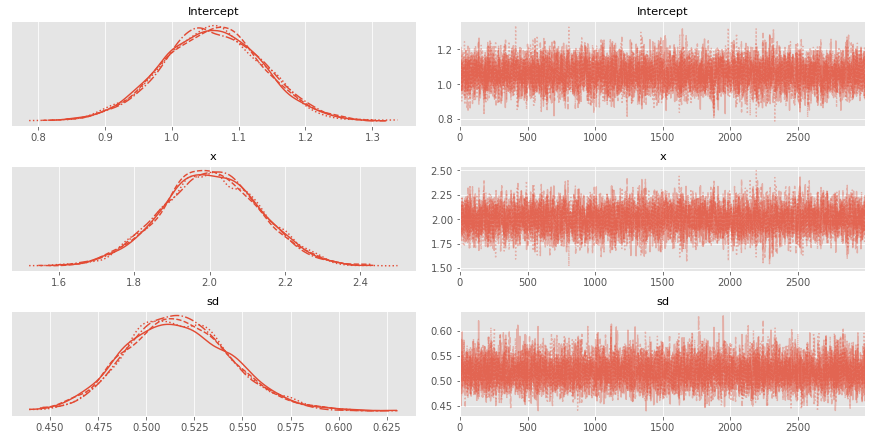

In [9]:
pm.traceplot(trace)
plt.show()

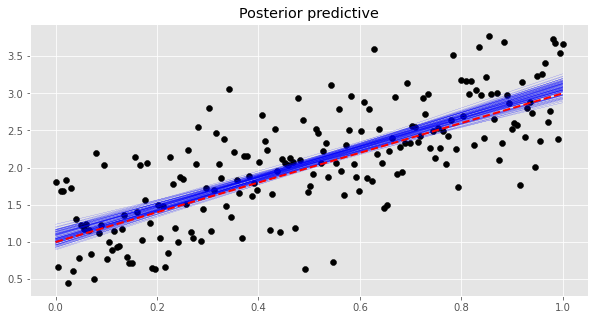

In [10]:
plt.scatter(X, y, c="black")
pm.plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines", c='blue')
plt.plot(X, (X *  true_slope + true_intercept), c='red')
plt.show()

In [11]:
pm.summary(trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
Intercept  1.061  0.075   0.918    1.199      0.001    0.001    4859.0   
x          2.003  0.129   1.773    2.261      0.002    0.001    4761.0   
sd         0.517  0.027   0.468    0.569      0.000    0.000    6097.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
Intercept  4859.0    4855.0    5248.0    1.0  
x          4724.0    4764.0    5444.0    1.0  
sd         6097.0    5890.0    4622.0    1.0

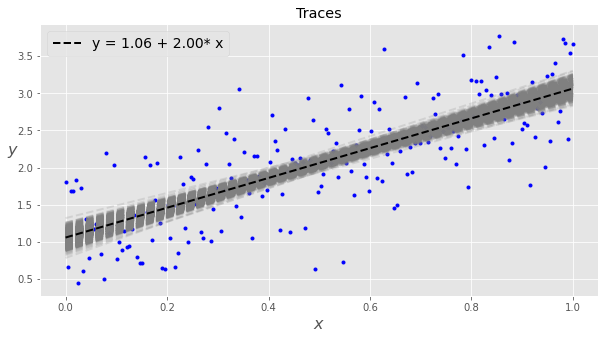

In [12]:
plt.plot(X, y, 'b.')

alpha_m = trace['Intercept'].mean()
beta_m = trace['x'].mean()

for idx in range(0, len(trace['Intercept']), 10):
    plt.plot(X, trace['Intercept'][idx] + trace['x'][idx] * X, c='gray', alpha=0.2)
plt.plot(X, alpha_m + beta_m * X, c='k', label='y = {:.2f} + {:.2f}* x'.format(alpha_m, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)
plt.title("Traces")
plt.show()

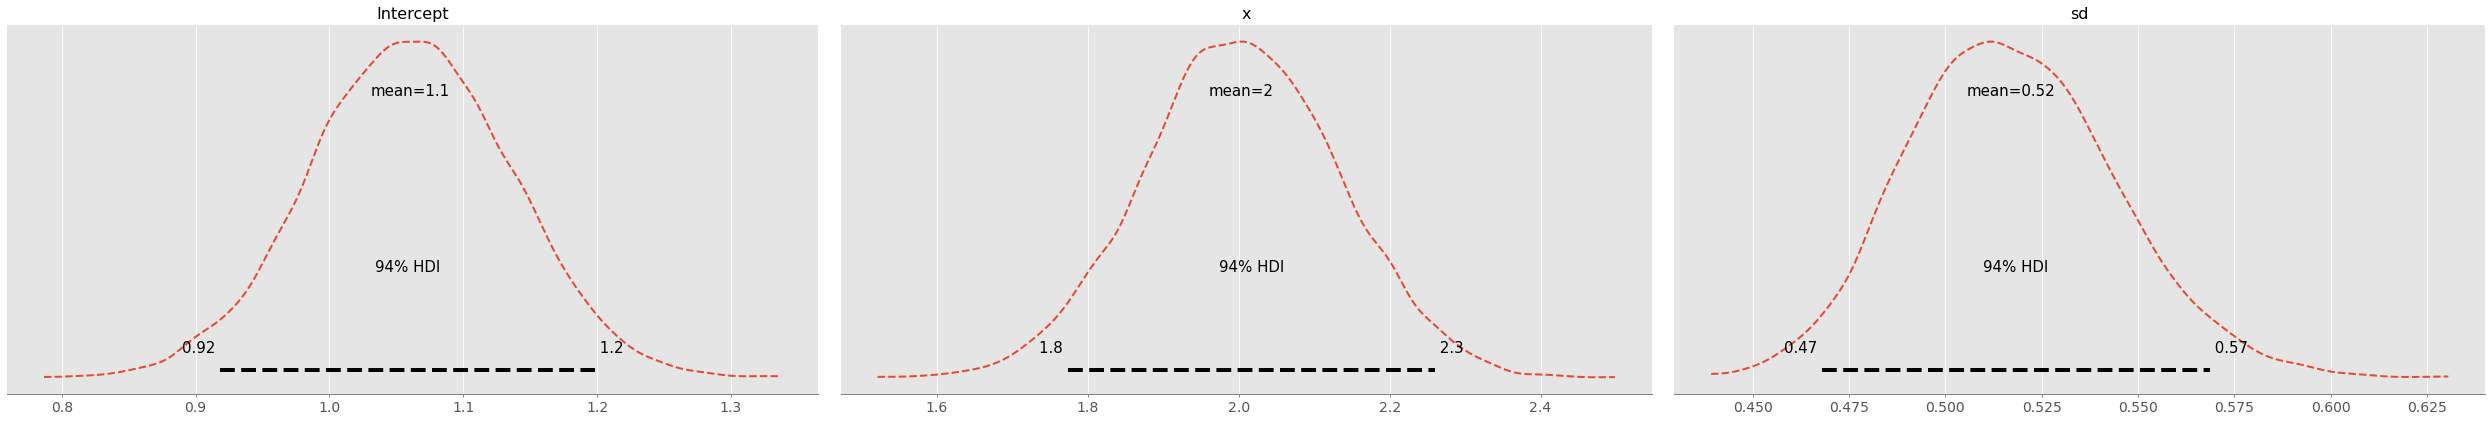

In [13]:
pm.plots.plot_posterior(trace)
plt.show()

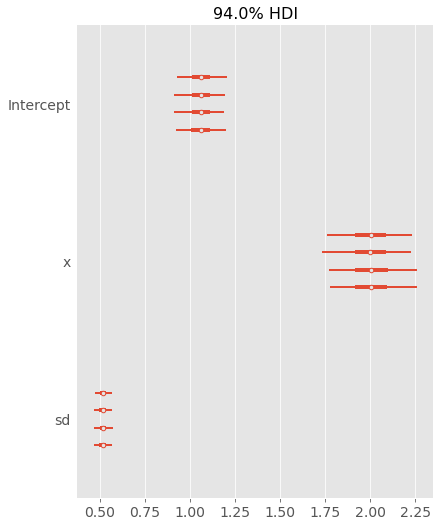

In [14]:
pm.plots.forestplot(trace)
plt.show()

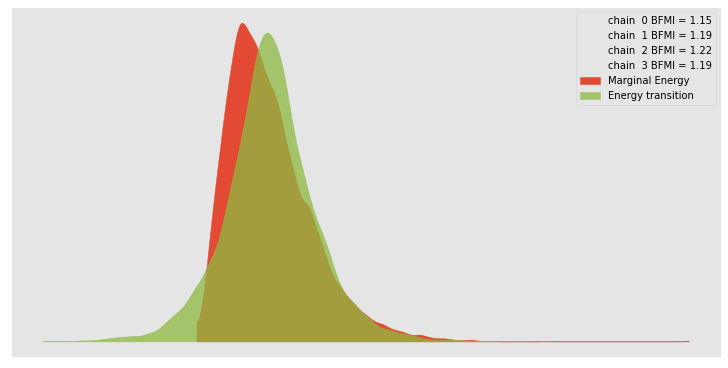

In [15]:
pm.plots.energyplot(trace)
plt.show()

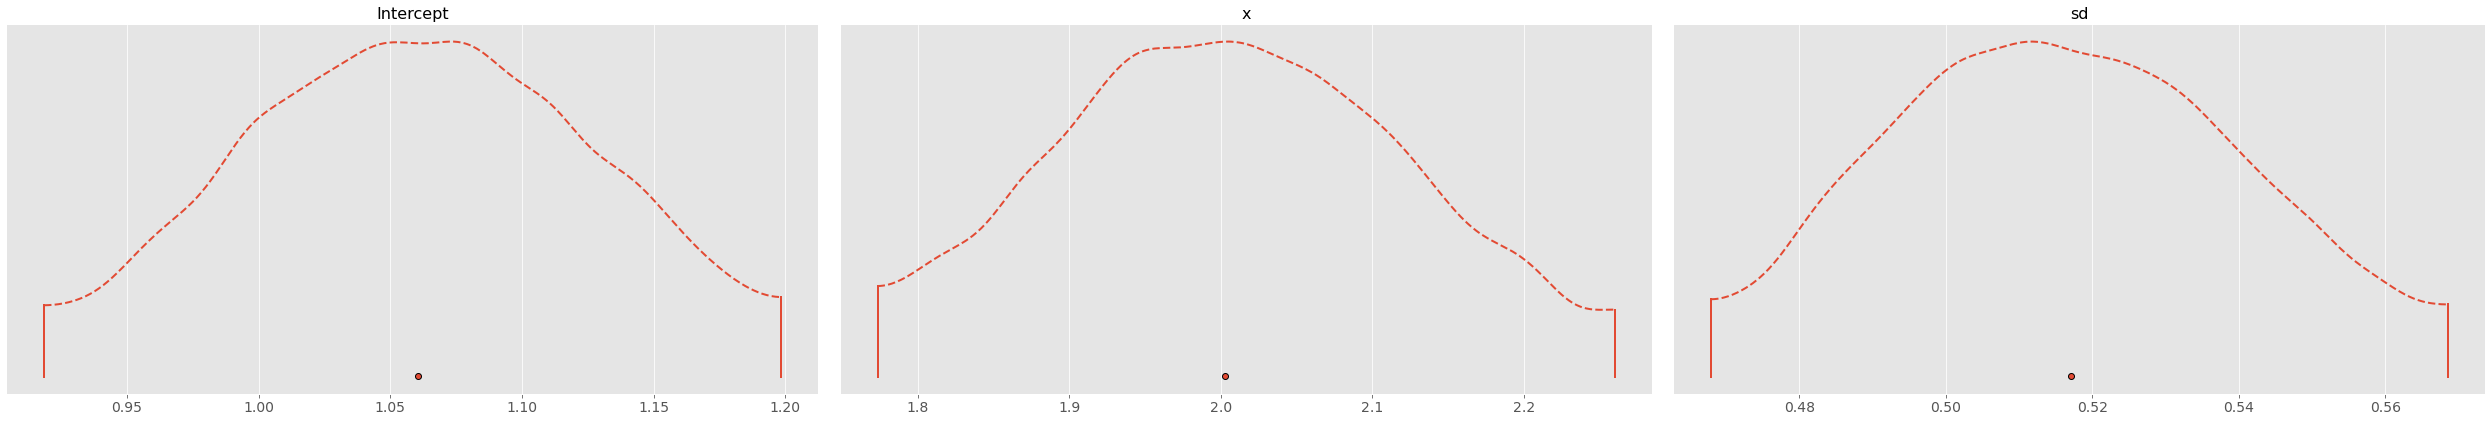

In [16]:
pm.plots.densityplot(trace)
plt.show()

In [17]:
ypred = pm.sampling.sample_posterior_predictive(model=model, trace=trace, samples=500)
y_sample_posterior_predictive = np.asarray(ypred['y'])

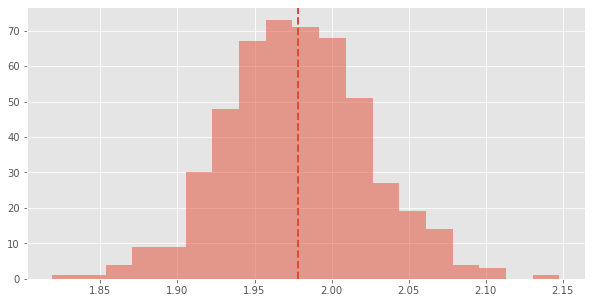

In [101]:
plt.hist([n.mean() for n in y_sample_posterior_predictive], bins=19, alpha=0.5)
plt.axvline(y.mean())
# set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')